In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [4]:
print(X_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [5]:
print(X_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [9]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [16]:
classes = ['airplane', 'automobile', 'bird','cat','deer',
          'dog', 'frog', 'horse','ship', 'truck']

In [17]:
def plot_sample(X,y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    

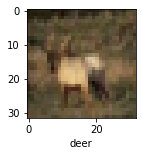

In [18]:
plot_sample(X_train, y_train, 3)

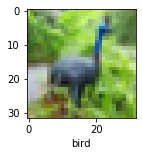

In [19]:
plot_sample(X_train, y_train, 6)

In [20]:
X_train = X_train/255
x_test = x_test/255

In [24]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
    
])

ann.compile(optimizer = 'SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy']
           )
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 121s 65ms/step - loss: 1.8122 - accuracy: 0.3542
Epoch 2/5
1563/1563 [==============================] - 101s 65ms/step - loss: 1.6223 - accuracy: 0.4273
Epoch 3/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.5396 - accuracy: 0.4577
Epoch 4/5
1563/1563 [==============================] - 133s 85ms/step - loss: 1.4764 - accuracy: 0.4801
Epoch 5/5
1563/1563 [==============================] - 144s 92ms/step - loss: 1.4306 - accuracy: 0.4958


### You can see that at the end of 5 epochs, accuracy is at around 49%

In [26]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.50      0.55      1000
           1       0.58      0.64      0.61      1000
           2       0.31      0.54      0.39      1000
           3       0.35      0.38      0.36      1000
           4       0.41      0.37      0.39      1000
           5       0.54      0.19      0.28      1000
           6       0.57      0.46      0.51      1000
           7       0.59      0.52      0.55      1000
           8       0.64      0.60      0.62      1000
           9       0.48      0.66      0.55      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.48     10000
weighted avg       0.51      0.48      0.48     10000



### Now let us build a convolutional neural network to train our images

In [28]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation='relu', input_shape = (32,32,3) ),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [29]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs = 10)


Epoch 1/10
1563/1563 [==============================] - 41s 25ms/step - loss: 1.5183 - accuracy: 0.4521
Epoch 2/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.1918 - accuracy: 0.5800
Epoch 3/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.0697 - accuracy: 0.6255
Epoch 4/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.9921 - accuracy: 0.6536
Epoch 5/10
1563/1563 [==============================] - 41s 27ms/step - loss: 0.9322 - accuracy: 0.6763
Epoch 6/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8816 - accuracy: 0.6920
Epoch 7/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8463 - accuracy: 0.7040
Epoch 8/10
1563/1563 [==============================] - 46s 30ms/step - loss: 0.8104 - accuracy: 0.7161
Epoch 9/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.7754 - accuracy: 0.7297
Epoch 10/10
1563/1563 [==============================] - 51s 33m

#### With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [30]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.9731 - accuracy: 0.6775


[0.9730506539344788, 0.6775000095367432]

In [32]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[1.06098142e-03, 6.90498127e-05, 2.46279710e-03, 1.32543370e-01,
        5.34569299e-05, 3.71816866e-02, 1.61039771e-03, 3.46243651e-05,
        8.24156880e-01, 8.26789706e-04],
       [3.77031043e-02, 2.09222604e-02, 2.23367497e-05, 1.49818177e-07,
        1.91112370e-08, 4.42709229e-08, 3.89612921e-07, 1.52800739e-09,
        9.37823176e-01, 3.52853443e-03],
       [1.41430527e-01, 5.48100471e-02, 2.91429902e-03, 3.03048262e-04,
        4.92871877e-05, 3.24680077e-05, 4.06204381e-05, 1.66844402e-04,
        6.60399675e-01, 1.39853209e-01],
       [2.99730957e-01, 6.58406469e-04, 9.89269232e-04, 4.01027501e-06,
        8.54239217e-04, 7.66996067e-08, 4.09480890e-05, 1.22937956e-06,
        6.97602868e-01, 1.18040931e-04],
       [1.43183370e-05, 4.17243500e-05, 2.39632800e-02, 1.19965123e-02,
        8.77707899e-01, 4.87053813e-03, 8.12551975e-02, 4.37456802e-05,
        1.02472644e-04, 4.37653944e-06]], dtype=float32)

In [33]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]


[8, 8, 8, 8, 4]

In [34]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

TypeError: only integer scalar arrays can be converted to a scalar index

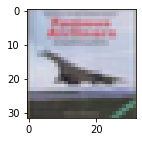

In [37]:
plot_sample(x_test, y_test, 3)

In [36]:
classes[y_classes[3]]

'ship'